In [1]:
import pandas as pd

In [2]:
athletes = pd.read_csv("../Dataset/athlete_events.csv")

In [3]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
columns = athletes.columns
print(columns)

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')


In [5]:
athletes

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [6]:
athletes.shape

(271116, 15)

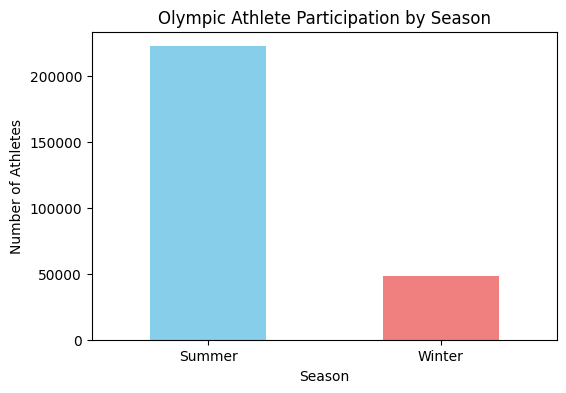

In [7]:
import matplotlib.pyplot as plt

# Count the number of athletes in each season
season_participation = athletes["Season"].value_counts()

# Plotting the participation count by season
plt.figure(figsize=(6, 4))
season_participation.plot(kind='bar', color=['skyblue', 'lightcoral'])

plt.title("Olympic Athlete Participation by Season")
plt.xlabel("Season")
plt.ylabel("Number of Athletes")
plt.xticks(rotation=0) 
plt.show()


In [8]:
athletes = athletes[athletes["Season"] == "Summer"]

In [9]:
def team_summary(data):
    return pd.Series({
        'team': data.iloc[0,:]["NOC"],
        'country': data.iloc[-1,:]["Team"],
        'year': data.iloc[0,:]["Year"],
        'events': len(data['Event'].unique()),
        'athletes': data.shape[0],
        'age': data["Age"].mean(),
        'height': data['Height'].mean(),
        'weight': data['Weight'].mean(),
        'medals': sum(~pd.isnull(data["Medal"]))
    })

team = athletes.groupby(["NOC", "Year"]).apply(team_summary)

C:\Users\HP\AppData\Local\Temp\ipykernel_5288\3415778410.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  team = athletes.groupby(["NOC", "Year"]).apply(team_summary)


In [10]:
team.head(30)

team               country  year  events  athletes        age  \
NOC Year                                                                 
AFG 1936  AFG           Afghanistan  1936       4        16  24.266667   
    1948  AFG           Afghanistan  1948       2        25        NaN   
    1956  AFG           Afghanistan  1956       1        12        NaN   
    1960  AFG           Afghanistan  1960      13        16  23.312500   
    1964  AFG           Afghanistan  1964       8         8  22.000000   
    1968  AFG           Afghanistan  1968       5         5  23.200000   
    1972  AFG           Afghanistan  1972       8         8  29.000000   
    1980  AFG           Afghanistan  1980      11        11  23.636364   
    1988  AFG           Afghanistan  1988       5         5        NaN   
    1996  AFG           Afghanistan  1996       2         2  23.500000   
    2004  AFG           Afghanistan  2004       5         5  18.600000   
    2008  AFG           Afghanistan  2008       4         4  22.500000   
    2012  AFG           Afghanistan  2012       6         6  24.833333   
    2016  AFG           Afghanistan  2016       3         3  24.666667   
AHO 1952  AHO  Netherlands Antilles  1952       1        11  23.090909   
    1960  AHO  Netherlands Antilles  1960       4         5  26.200000   
    1964  AHO  Netherlands Antilles  1964       4         4  28.500000   
    1968  AHO  Netherlands Antilles  1968       4         5  31.000000   
    1972  AHO  Netherlands Antilles  1972       2         2  38.500000   
    1976  AHO  Netherlands Antilles  1976       4         4  27.333333   
    1984  AHO  Netherlands Antilles  1984      10        13  18.230769   
    1988  AHO  Netherlands Antilles  1988       4         4  25.000000   
    1992  AHO  Netherlands Antilles  1992       4         4  30.250000   
    1996  AHO  Netherlands Antilles  1996       7         7  30.142857   
    2000  AHO  Netherlands Antilles  2000       8         8  30.625000   
    2004  AHO  Netherlands Antilles  2004       3         3  32.333333   
    2008  AHO  Netherlands Antilles  2008       4         4  23.000000   
ALB 1972  ALB               Albania  1972       3         5  26.800000   
    1992  ALB               Albania  1992       8         9  25.333333   
    1996  ALB               Albania  1996       7         9  26.777778   

              height     weight  medals  
NOC Year                                 
AFG 1936         NaN        NaN       0  
    1948         NaN        NaN       0  
    1956         NaN        NaN       0  
    1960  170.687500  69.437500       0  
    1964  161.000000  64.250000       0  
    1968  170.200000  70.000000       0  
    1972  168.333333  63.750000       0  
    1980  168.363636  63.181818       0  
    1988         NaN        NaN       0  
    1996         NaN        NaN       0  
    2004  170.750000  64.750000       0  
    2008  179.250000  62.750000       1  
    2012  171.666667  60.833333       1  
    2016  173.666667  74.000000       0  
AHO 1952         NaN        NaN       0  
    1960  170.200000  83.900000       0  
    1964  171.250000  69.375000       0  
    1968  173.200000  67.800000       0  
    1972  164.000000  86.000000       0  
    1976  174.500000  66.000000       0  
    1984  181.111111  69.777778       0  
    1988  193.000000  80.000000       1  
    1992  178.000000  83.500000       0  
    1996  178.000000  83.250000       0  
    2000  179.125000  79.625000       0  
    2004  183.666667  80.000000       0  
    2008  178.750000  74.500000       0  
ALB 1972         NaN  59.000000       0  
    1992  163.000000  75.250000       0  
    1996  169.000000  67.500000       0

In [11]:
team.tail(30)

team     country  year  events  athletes        age      height  \
NOC Year                                                                   
YUG 1976  YUG  Yugoslavia  1976      52        95  24.400000  185.505263   
    1980  YUG  Yugoslavia  1980      69       180  24.318436  183.324022   
    1984  YUG  Yugoslavia  1984      53       154  24.629870  182.396104   
    1988  YUG  Yugoslavia  1988      72       183  23.879781  182.825137   
ZAM 1964  ZAM      Zambia  1964      13        15  21.666667  175.733333   
    1968  ZAM      Zambia  1968       5         7  20.142857  175.250000   
    1972  ZAM      Zambia  1972      12        12  21.166667  168.500000   
    1980  ZAM      Zambia  1980      25        43  27.227273  174.214286   
    1984  ZAM      Zambia  1984      18        18  22.300000  173.714286   
    1988  ZAM      Zambia  1988      11        33  24.030303  172.781250   
    1992  ZAM      Zambia  1992      11        11  22.818182  169.714286   
    1996  ZAM      Zambia  1996       8         8  25.750000  170.166667   
    2000  ZAM      Zambia  2000       8         8  23.000000  173.166667   
    2004  ZAM      Zambia  2004       6         6  22.500000  173.666667   
    2008  ZAM      Zambia  2008       8         8  21.875000  168.714286   
    2012  ZAM      Zambia  2012       7         7  22.571429  176.166667   
    2016  ZAM      Zambia  2016       7         7  24.142857  175.166667   
ZIM 1928  ZIM    Zimbabwe  1928       2         2  20.000000         NaN   
    1960  ZIM    Zimbabwe  1960       6        10  14.800000  155.000000   
    1964  ZIM    Zimbabwe  1964      15        33  25.303030  174.454545   
    1980  ZIM    Zimbabwe  1980      30        52  26.941176  171.942308   
    1984  ZIM    Zimbabwe  1984      18        20  29.100000  173.950000   
    1988  ZIM    Zimbabwe  1988      38        47  25.106383  176.489362   
    1992  ZIM    Zimbabwe  1992      22        28  21.214286  171.142857   
    1996  ZIM    Zimbabwe  1996      15        21  23.761905  176.705882   
    2000  ZIM    Zimbabwe  2000      19        26  24.961538  178.960000   
    2004  ZIM    Zimbabwe  2004      11        14  25.071429  177.785714   
    2008  ZIM    Zimbabwe  2008      15        16  26.062500  171.928571   
    2012  ZIM    Zimbabwe  2012       8         9  27.333333  174.444444   
    2016  ZIM    Zimbabwe  2016      13        31  27.483871  167.838710   

             weight  medals  
NOC Year                     
YUG 1976  82.621053      19  
    1980  79.202247      57  
    1984  78.331169      87  
    1988  77.644809      63  
ZAM 1964  68.000000       0  
    1968  60.250000       0  
    1972  58.250000       0  
    1980  67.950000       0  
    1984  67.800000       1  
    1988  68.093750       0  
    1992  64.428571       0  
    1996  60.571429       1  
    2000  64.833333       0  
    2004  64.500000       0  
    2008  62.750000       0  
    2012  74.166667       0  
    2016  67.500000       0  
ZIM 1928        NaN       0  
    1960  58.500000       0  
    1964  70.393939       0  
    1980  70.980769      15  
    1984  67.550000       0  
    1988  70.319149       0  
    1992  62.428571       0  
    1996  68.666667       0  
    2000  71.080000       0  
    2004  70.500000       3  
    2008  63.714286       4  
    2012  65.222222       0  
    2016  62.193548       0

In [12]:
team = team.reset_index(drop=True)
team = team.dropna()

In [13]:
team.head(30)

,team,country,year,events,athletes,age,height,weight,medals
3,AFG,Afghanistan,1960,13,16,23.312500,170.687500,69.437500,0
4,AFG,Afghanistan,1964,8,8,22.000000,161.000000,64.250000,0
5,AFG,Afghanistan,1968,5,5,23.200000,170.200000,70.000000,0
6,AFG,Afghanistan,1972,8,8,29.000000,168.333333,63.750000,0
7,AFG,Afghanistan,1980,11,11,23.636364,168.363636,63.181818,0
10,AFG,Afghanistan,2004,5,5,18.600000,170.750000,64.750000,0
11,AFG,Afghanistan,2008,4,4,22.500000,179.250000,62.750000,1
12,AFG,Afghanistan,2012,6,6,24.833333,171.666667,60.833333,1
13,AFG,Afghanistan,2016,3,3,24.666667,173.666667,74.000000,0
15,AHO,Netherlands Antilles,1960,4,5,26.200000,170.200000,83.900000,0


In [14]:
def prev_medals(data):
    data = data.sort_values("year", ascending=True)
    data["prev_medals"] = data["medals"].shift(1)  
    data["prev_3_medals"] = data["medals"].rolling(3, closed="left", min_periods=1).mean()
    return data

# Group by team
team = team.groupby(["team"]).apply(prev_medals)


team = team.reset_index(drop=True)
team = team[team["year"] > 1960]


team = team.round(1)

C:\Users\HP\AppData\Local\Temp\ipykernel_5288\956313139.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  team = team.groupby(["team"]).apply(prev_medals)


In [15]:
team


,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
1,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
2,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
3,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
4,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
5,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2608,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2609,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2610,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2611,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [16]:
team.shape

(2144, 11)

In [17]:
# Find the row with the highest medals
highest_medals_row= team.loc[team["medals"].idxmax()]

print(highest_medals_row)

team                      URS
country          Soviet Union
year                     1980
events                    202
athletes                  660
age                      23.7
height                  176.5
weight                   72.6
medals                    442
prev_medals             286.0
prev_3_medals           230.7
Name: 2461, dtype: object


In [18]:
team[team["team"] == "USA"]

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
2497,USA,United States,1964,159,492,23.5,177.2,71.8,169,125.0,127.3
2498,USA,United States,1968,167,529,23.5,177.2,72.1,166,169.0,139.0
2499,USA,United States,1972,185,578,23.6,177.6,71.7,171,166.0,153.3
2500,USA,United States,1976,189,554,23.0,177.3,71.0,164,171.0,168.7
2501,USA,United States,1984,217,693,24.6,177.2,71.6,352,164.0,167.0
2502,USA,United States,1988,230,715,25.2,177.1,71.4,207,352.0,229.0
2503,USA,United States,1992,248,734,25.7,177.0,71.9,224,207.0,241.0
2504,USA,United States,1996,263,839,26.4,177.5,73.2,259,224.0,261.0
2505,USA,United States,2000,265,764,26.6,177.3,73.6,242,259.0,230.0
2506,USA,United States,2004,254,726,26.5,177.0,73.6,263,242.0,241.7


In [19]:
import os
print(os.getcwd())

D:\Olympic_Medal_Predictor\Model


In [20]:
import os

dataset_directory = os.path.join("..", "Dataset")
os.makedirs(dataset_directory, exist_ok=True)

team.to_csv(os.path.join(dataset_directory, "teams.csv"), index=False)

print("teams.csv has been saved in the Dataset folder.")

teams.csv has been saved in the Dataset folder.
